Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

Loading the Data

In [2]:
mat=loadmat('ex5/ex5data1.mat')

In [3]:
X, y = mat['X'], mat['y']

Input Data Plot

Text(0.5, 1.0, 'Training Set')

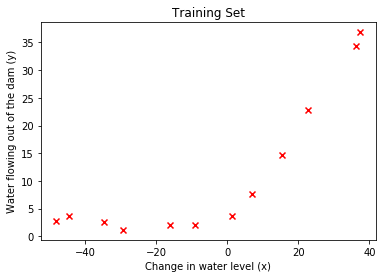

In [4]:
fig, ax1 = plt.subplots()
ax1.scatter(X, y, marker='x', c='r')
ax1.set_xlabel('Change in water level (x)')
ax1.set_ylabel('Water flowing out of the dam (y)')
ax1.set_title('Training Set')

Learning $\theta$ for Linear Regression using Gradient Descent

In [5]:
in_theta_lin = np.array([1.0,1.0])

In [6]:
def LinRegCostFunc(X, y, theta, lambda1):
    m = X.shape[0]
    htx = theta[0] + theta[1]*X
    J = 0.5 * (1/m) * np.sum((htx - y)**2)
    J_reg = J + ((0.5 * lambda1) * (1/m) * (theta[1]**2))
    j0 = (1/m) * np.sum(htx-y)
    j1 = (1/m) * np.sum((htx-y)*X) + (1/m) * lambda1 * theta[1]
    return J_reg, j0, j1

In [7]:
LinRegCostFunc(X, y, in_theta_lin, 1)

(303.9931922202643, -15.303015674201186, 598.2507441727035)

In [8]:
def LinRegGradDesc(X, y, theta, lambda1, alpha, num_iters):
    J_hist = []
    theta_hist = []
    for i in range(num_iters):
        J, j0, j1 = LinRegCostFunc(X, y, theta, lambda1)
        t1 = theta[0] - alpha*j0
        t2 = theta[1] - alpha*j1
        theta_hist.append(np.array([t1,t2]))
        theta[0] = t1
        theta[1] = t2
        J_hist.append(J)
    return J_hist, theta_hist, theta

In [9]:
cost, theta_hist, theta_lin = LinRegGradDesc(X, y, in_theta_lin, 0, 0.001, 4000)

In [10]:
theta_lin

array([12.83833648,  0.36628247])

In [11]:
cost[-1]

22.404158253449673

In [12]:
-50*theta_lin[1] + theta_lin[0]

-5.475787063813311

In [13]:
40*theta_lin[1] + theta_lin[0]

27.489635311404275

Regression Line and Cost Plots

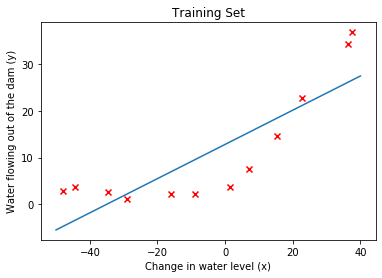

In [14]:
fig, ax1 = plt.subplots()
ax1.scatter(X, y, marker='x', c='r')
ax1.set_xlabel('Change in water level (x)')
ax1.set_ylabel('Water flowing out of the dam (y)')
ax1.set_title('Training Set')
ax1.plot([-50, 40], [-5.475787, 27.489635311404275])

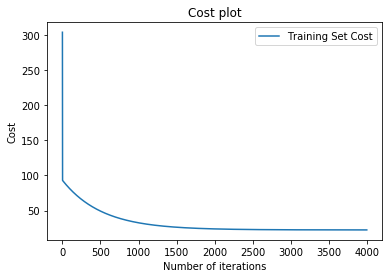

In [15]:
fig, ax2 = plt.subplots()
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Cost')
ax2.set_title('Cost plot')
ax2.plot(cost, label='Training Set Cost')
ax2.legend()

Bias vs Variance (Method 1)

In [16]:
Xval, yval = mat['Xval'], mat['yval']

In [17]:
type(theta_hist[0][0])

numpy.float64

In [18]:
cvcost = []
for i in range(len(cost)):
    htx = theta_hist[i][0] + theta_hist[i][1]*Xval
    costcv = 0.5 * (1/Xval.shape[0]) * np.sum((htx - yval)**2)
    cvcost.append(costcv)

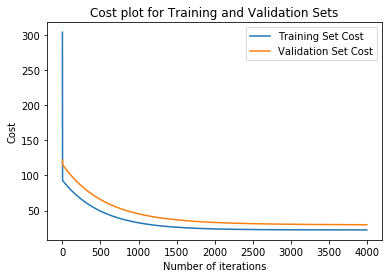

In [19]:
fig, ax2 = plt.subplots()
ax2.plot(cost, label='Training Set Cost')
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Cost')
ax2.set_title('Cost plot for Training and Validation Sets')
ax2.plot(cvcost, label='Validation Set Cost')
ax2.legend()

Bias vs Variance (Method 2) (as instructed in the course)

In [20]:
def LearningCurves_lin(X, y, Xval, yval, lambda1):
    m = X.shape[0]
    err_train, err_val = [], []
    for i in range(1, m+1):
        theta = LinRegGradDesc(X[0:i, :], y[0:i, :], np.array([1.0,1.0]), 0, 0.001, 3000)[2]
        err_train.append(LinRegCostFunc(X[0:i, :], y[0:i, :], theta, 0)[0])
        err_val.append(LinRegCostFunc(Xval, yval, theta, 0)[0])
    return err_train, err_val

In [21]:
err_train_lin, err_val_lin = LearningCurves_lin(X, y, Xval, yval, 0)

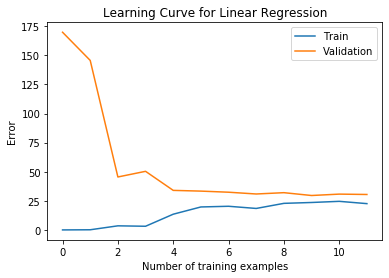

In [22]:
fig, ax3 = plt.subplots()
ax3.set_title('Learning Curve for Linear Regression')
ax3.set_xlabel('Number of training examples')
ax3.set_ylabel('Error')
ax3.plot(range(12), err_train_lin, label='Train')
ax3.plot(range(12), err_val_lin, label='Validation')
ax3.legend()

Polynomial Regression

Feature Mapping and Normalization

In [23]:
def PolyFeatures(X, p):
    for i in range(2, p+1):
        X = np.hstack((X, (X[:, 0]**i)[:, np.newaxis]))
    return X

In [24]:
def normalizer(X):
    n = X.shape[1]
    for i in range(n):
        y = X[:, i][:, np.newaxis]
        mean = y.mean()
        std = y.std()
        y = (y-mean)/std
        X = np.hstack((X,y))
    return X[:, n:], mean, std

In [25]:
Xpol = PolyFeatures(X, 8)
Xnorm, mu, sigma = normalizer(Xpol)

In [26]:
Xval_pol = PolyFeatures(Xval, 8)
Xval_norm, mu_val, sigma_val = normalizer(Xval_pol)

Cost Function & Gradient Descent

In [27]:
in_theta_pol = np.zeros((Xnorm.shape[1]+1, 1))

In [28]:
def PolyRegCostFunc(X, y, theta, lambda1):
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)), X))
    htx = X @ theta
    J = 0.5 * (1/m) * np.sum((htx-y)**2)
    J_reg = J + (0.5 * lambda1) * (1/m) * np.sum((theta**2)[1:, :])
    j0 = (1/m) * (X.T @ (htx-y))[0]
    j1 = (1/m) * (X.T @ (htx-y))[1:] + ((lambda1/m) * theta)[1:]
    grad = np.vstack((j0[:, np.newaxis], j1))
    return J_reg, grad

In [29]:
def PolyRegGradDesc(X, y, theta, lambda1, alpha, num_iters):
    J_hist = []
    for i in range(num_iters):
        J, grad = PolyRegCostFunc(X, y, theta, lambda1)
        theta = theta - alpha*grad
        J_hist.append(J)
    return J_hist, theta

In [30]:
cost, theta_pol = PolyRegGradDesc(Xnorm, y, in_theta_pol, 0, 0.01, 3000)

In [31]:
cost[0], cost[-1]

(140.95412088055392, 0.7324835742363769)

Cost Function Plot

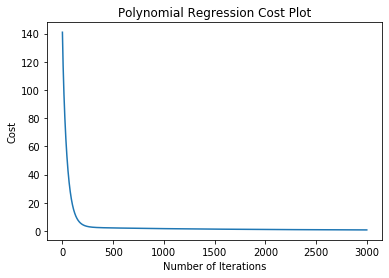

In [32]:
fig, ax4 = plt.subplots()
ax4.set_xlabel('Number of Iterations')
ax4.set_ylabel('Cost')
ax4.set_title('Polynomial Regression Cost Plot')
ax4.plot(cost)

Plotting the Regression curve

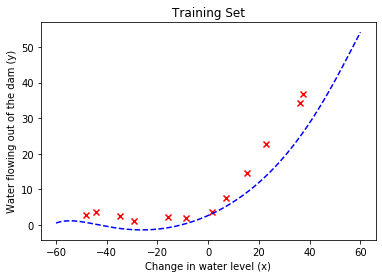

In [33]:
fig, ax5 = plt.subplots()
ax5.scatter(X, y, marker='x', c='r')
ax5.set_xlabel('Change in water level (x)')
ax5.set_ylabel('Water flowing out of the dam (y)')
ax5.set_title('Training Set')
xmap = np.linspace(-60, 60, 2400)
xmap_norm = PolyFeatures(xmap[:, np.newaxis], 8)
xmap_norm = normalizer(xmap_norm)[0]
xmap_norm = np.hstack((np.ones((xmap_norm.shape[0],1)), xmap_norm))
ymap_norm = xmap_norm @ theta_pol
ax5.plot(xmap, ymap_norm, '--', color='b')

Learning Curve for Polynomial Regression

In [34]:
def LearningCurves_pol(X, y, Xval, yval, lambda1):
    m = X.shape[0]
    err_train, err_val = [], []
    for i in range(1, m+1):
        theta = PolyRegGradDesc(X[0:i, :], y[0:i, :], in_theta_pol, 0, 0.01, 3000)[1]
        err_train.append(PolyRegCostFunc(X[0:i, :], y[0:i, :], theta, 0)[0])
        err_val.append(PolyRegCostFunc(Xval, yval, theta, 0)[0])
    return err_train, err_val

In [35]:
err_train_pol, err_val_pol = LearningCurves_pol(Xnorm, y, Xval_norm, yval, 0)

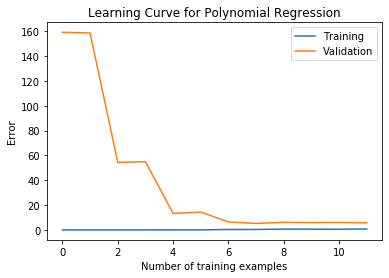

In [36]:
fig, ax6 = plt.subplots()
ax6.set_title('Learning Curve for Polynomial Regression')
ax6.set_xlabel('Number of training examples')
ax6.set_ylabel('Error')
ax6.plot(range(12), err_train_pol, label='Training')
ax6.plot(range(12), err_val_pol, label='Validation')
ax6.legend()

Adjusting the Regularization Parameter

$\lambda$ = 1

In [37]:
cost_l1, theta_pol_l1 = PolyRegGradDesc(Xnorm, y, in_theta_pol, 1, 0.01, 3000)

In [38]:
cost_l1[0], cost_l1[-1]

(140.95412088055392, 6.831112607289329)

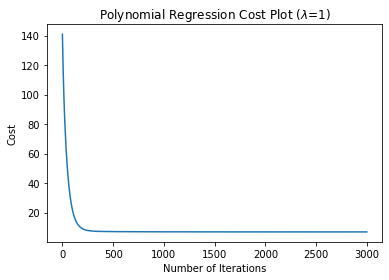

In [39]:
fig, ax7 = plt.subplots()
ax7.set_xlabel('Number of Iterations')
ax7.set_ylabel('Cost')
ax7.set_title('Polynomial Regression Cost Plot ($\lambda$=1)')
ax7.plot(cost_l1)

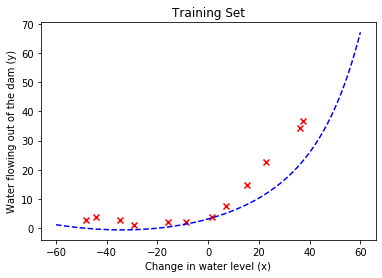

In [40]:
fig, ax8 = plt.subplots()
ax8.scatter(X, y, marker='x', c='r')
ax8.set_xlabel('Change in water level (x)')
ax8.set_ylabel('Water flowing out of the dam (y)')
ax8.set_title('Training Set')
xmap_l1 = np.linspace(-60, 60, 2400)
xmap_norm_l1 = PolyFeatures(xmap_l1[:, np.newaxis], 8)
xmap_norm_l1 = normalizer(xmap_norm_l1)[0]
xmap_norm_l1 = np.hstack((np.ones((xmap_norm_l1.shape[0],1)), xmap_norm_l1))
ymap_norm_l1 = xmap_norm_l1 @ theta_pol_l1
ax8.plot(xmap_l1, ymap_norm_l1, '--', color='b')

$\lambda$ = 100

In [41]:
cost_l100, theta_pol_l100 = PolyRegGradDesc(Xnorm, y, in_theta_pol, 100, 0.01, 3000)

In [42]:
cost_l100[0], cost_l100[-1]

(140.95412088055392, 65.95095506281515)

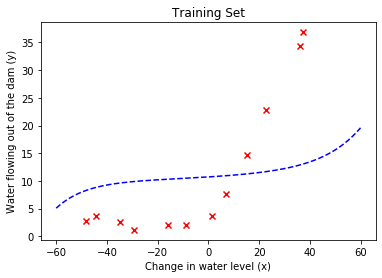

In [44]:
fig, ax9 = plt.subplots()
ax9.scatter(X, y, marker='x', c='r')
ax9.set_xlabel('Change in water level (x)')
ax9.set_ylabel('Water flowing out of the dam (y)')
ax9.set_title('Training Set')
xmap_l100 = np.linspace(-60, 60, 2400)
xmap_norm_l100 = PolyFeatures(xmap_l100[:, np.newaxis], 8)
xmap_norm_l100 = normalizer(xmap_norm_l100)[0]
xmap_norm_l100 = np.hstack((np.ones((xmap_norm_l100.shape[0],1)), xmap_norm_l100))
ymap_norm_l100 = xmap_norm_l100 @ theta_pol_l100
ax9.plot(xmap_l100, ymap_norm_l100, '--', color='b')